In [1]:
import glob, os
import re

In [2]:
glob_list = []

#loop through subject folders and glob
for subject in range(25):
    glob_list.append(glob.glob(str(subject) + "\\[0-9]*.csv"))
    
#function to flatten glob
flatten = lambda l: [item for sublist in l for item in sublist]
glob_list = flatten(glob_list)
glob_list

['0\\0_Left.csv',
 '0\\0_Right.csv',
 '0\\10_Left.csv',
 '0\\10_Right.csv',
 '0\\1_Left.csv',
 '0\\1_Right.csv',
 '0\\2_Left.csv',
 '0\\2_Right.csv',
 '0\\3_Left.csv',
 '0\\3_Right.csv',
 '0\\4_Left.csv',
 '0\\4_Right.csv',
 '0\\5_Left.csv',
 '0\\5_Right.csv',
 '0\\6_Left.csv',
 '0\\6_Right.csv',
 '0\\7_Left.csv',
 '0\\7_Right.csv',
 '0\\8_Left.csv',
 '0\\8_Right.csv',
 '0\\9_Left.csv',
 '0\\9_Right.csv',
 '1\\0_Left.csv',
 '1\\0_Right.csv',
 '1\\10_Left.csv',
 '1\\10_Right.csv',
 '1\\1_Left.csv',
 '1\\1_Right.csv',
 '1\\2_Left.csv',
 '1\\2_Right.csv',
 '1\\3_Left.csv',
 '1\\3_Right.csv',
 '1\\4_Left.csv',
 '1\\4_Right.csv',
 '1\\5_Left.csv',
 '1\\5_Right.csv',
 '1\\6_Left.csv',
 '1\\6_Right.csv',
 '1\\7_Left.csv',
 '1\\7_Right.csv',
 '1\\8_Left.csv',
 '1\\8_Right.csv',
 '1\\9_Left.csv',
 '1\\9_Right.csv',
 '2\\0_Left.csv',
 '2\\0_Right.csv',
 '2\\10_Left.csv',
 '2\\10_Right.csv',
 '2\\1_Left.csv',
 '2\\1_Right.csv',
 '2\\2_Left.csv',
 '2\\2_Right.csv',
 '2\\3_Left.csv',
 '2\\3_Right.c

In [3]:
#make a list of tuples of hand pairings
lr_pairs = list(zip(*[iter(glob_list)]*2))
lr_pairs

[('0\\0_Left.csv', '0\\0_Right.csv'),
 ('0\\10_Left.csv', '0\\10_Right.csv'),
 ('0\\1_Left.csv', '0\\1_Right.csv'),
 ('0\\2_Left.csv', '0\\2_Right.csv'),
 ('0\\3_Left.csv', '0\\3_Right.csv'),
 ('0\\4_Left.csv', '0\\4_Right.csv'),
 ('0\\5_Left.csv', '0\\5_Right.csv'),
 ('0\\6_Left.csv', '0\\6_Right.csv'),
 ('0\\7_Left.csv', '0\\7_Right.csv'),
 ('0\\8_Left.csv', '0\\8_Right.csv'),
 ('0\\9_Left.csv', '0\\9_Right.csv'),
 ('1\\0_Left.csv', '1\\0_Right.csv'),
 ('1\\10_Left.csv', '1\\10_Right.csv'),
 ('1\\1_Left.csv', '1\\1_Right.csv'),
 ('1\\2_Left.csv', '1\\2_Right.csv'),
 ('1\\3_Left.csv', '1\\3_Right.csv'),
 ('1\\4_Left.csv', '1\\4_Right.csv'),
 ('1\\5_Left.csv', '1\\5_Right.csv'),
 ('1\\6_Left.csv', '1\\6_Right.csv'),
 ('1\\7_Left.csv', '1\\7_Right.csv'),
 ('1\\8_Left.csv', '1\\8_Right.csv'),
 ('1\\9_Left.csv', '1\\9_Right.csv'),
 ('2\\0_Left.csv', '2\\0_Right.csv'),
 ('2\\10_Left.csv', '2\\10_Right.csv'),
 ('2\\1_Left.csv', '2\\1_Right.csv'),
 ('2\\2_Left.csv', '2\\2_Right.csv'),
 ('2\\

In [4]:
import pandas as pd

df_list = []

for pair in lr_pairs:
    df_left = pd.read_csv(pair[0], index_col=None).drop(['Unnamed: 0'], axis = 1)
    df_right = pd.read_csv(pair[1], index_col=None).drop(['Unnamed: 0'], axis = 1)
    
    #rename columns
    df_left = df_left.add_prefix('left')
    df_right = df_right.add_prefix('right')
    
    #merge
    df = pd.merge(df_left, df_right, left_on='leftTime', right_on='rightTime').drop('rightTime', axis = 1)

    #covert fist column to time object
    df['leftTime'] = pd.to_datetime(df['leftTime'].str[:-3], format = '%H:%M:%S.%f')
    
    #difference between rows
    df = df.diff().iloc[1:]
    df['leftTime'] = df['leftTime'].dt.total_seconds()
    
    #add sign and subject using regex of file name
    subject_sign = re.split(r'\\', re.findall('^[^_]+(?=_)', pair[0])[0])
    df.insert(loc = 0, column = 'Subject', value = subject_sign[0])
    df.insert(loc = 0, column = 'Sign', value = subject_sign[1])
    
#this makes velocity columns

#     for col in df.iloc[:,2:]:
#         df[col + ' velocity'] = df[col]/df['Time']
    
    df_list.append(df)

In [5]:
#numbers 0-10 for 25 subjects
len(df_list)

275

In [6]:
#example entry
df_list[35]

,Sign,Subject,leftTime,left thumbProximal_L_X,left thumbProximal_L_Y,left thumbProximal_L_Z,left thumbDistal_L_X,left thumbDistal_L_Y,left thumbDistal_L_Z,left thumbEF_L_X,...,right armFrontRadius_L_Z,right armFrontUlna_L_X,right armFrontUlna_L_Y,right armFrontUlna_L_Z,right armBackLateral_L_X,right armBackLateral_L_Y,right armBackLateral_L_Z,right armBackMedial_L_X,right armBackMedial_L_Y,right armBackMedial_L_Z
1,1,3,0.024,-0.000577,1.844800e-04,-1.800000e-05,-0.000519,7.800000e-07,0.000178,-0.000377,...,0.000050,-0.000026,0.000057,3.140000e-05,0.000094,0.000116,0.000057,0.000044,0.000091,0.000038
2,1,3,0.020,-0.000593,4.397900e-04,-8.140000e-04,-0.000707,7.145700e-04,-0.001065,-0.000806,...,0.000021,-0.000063,0.000028,4.000000e-07,-0.000055,0.000010,0.000045,-0.000122,-0.000010,0.000025
3,1,3,0.029,-0.000376,2.671000e-05,-7.123000e-04,-0.000767,7.511100e-04,-0.001306,-0.001038,...,-0.000062,-0.000336,-0.000227,-4.470000e-05,-0.000235,-0.000281,0.000181,-0.000228,-0.000239,0.000198
4,1,3,0.032,-0.001070,5.973500e-04,-1.343000e-03,-0.001094,1.048740e-03,-0.002128,-0.000922,...,0.000079,-0.000257,-0.000123,1.661000e-04,-0.000370,-0.000337,0.000453,-0.000194,-0.000195,0.000541
5,1,3,0.028,-0.000710,4.489200e-04,-1.115300e-03,-0.000682,8.448700e-04,-0.001965,-0.000504,...,-0.000016,-0.000379,-0.000141,-2.120000e-05,-0.000485,-0.000330,0.000225,-0.000563,-0.000306,0.000219
6,1,3,0.028,-0.000179,1.419500e-04,-5.499000e-04,-0.000236,4.242300e-04,-0.001061,-0.000225,...,-0.000248,-0.000108,0.000020,-2.576000e-04,-0.000036,0.000099,-0.000329,-0.000043,0.000076,-0.000339
7,1,3,0.030,-0.000151,9.140000e-05,-1.612000e-04,-0.000034,1.050000e-04,-0.000428,0.000027,...,-0.000206,0.000109,0.000157,-1.916000e-04,0.000184,0.000282,-0.000350,0.000266,0.000280,-0.000336
8,1,3,0.030,0.000102,-2.486000e-05,1.426000e-04,-0.000067,2.199100e-04,-0.000093,-0.000183,...,-0.000042,-0.000256,-0.000100,-8.740000e-05,0.000097,0.000147,-0.000153,0.000007,0.000070,-0.000198
9,1,3,0.028,-0.000021,-2.802900e-04,2.999000e-04,-0.000026,-1.878200e-04,0.000081,0.000027,...,-0.000016,-0.000204,-0.000083,-1.560000e-05,0.000032,0.000136,-0.000165,0.000083,0.000111,-0.000165
10,1,3,0.030,0.000150,-3.657600e-04,2.713000e-04,0.000127,-2.781700e-04,0.000098,0.000125,...,0.000127,-0.000258,-0.000123,1.591000e-04,-0.000112,-0.000056,0.000203,-0.000017,-0.000016,0.000236


In [7]:
#concatenate list of frames
sign_frame = pd.concat(df_list, axis=0, ignore_index=False)
sign_frame

,Sign,Subject,leftTime,left thumbProximal_L_X,left thumbProximal_L_Y,left thumbProximal_L_Z,left thumbDistal_L_X,left thumbDistal_L_Y,left thumbDistal_L_Z,left thumbEF_L_X,...,right armFrontRadius_L_Z,right armFrontUlna_L_X,right armFrontUlna_L_Y,right armFrontUlna_L_Z,right armBackLateral_L_X,right armBackLateral_L_Y,right armBackLateral_L_Z,right armBackMedial_L_X,right armBackMedial_L_Y,right armBackMedial_L_Z
1,0,0,0.028,0.000388,0.000133,0.000050,0.000406,0.000153,0.000063,4.030000e-04,...,-0.000321,-0.000166,0.000114,-0.000298,-8.360000e-05,-0.000393,-0.000142,-0.000071,-0.000331,-0.000119
2,0,0,0.036,0.000420,0.000077,-0.000248,0.000443,0.000085,-0.000239,4.293000e-04,...,-0.000235,-0.000095,0.000121,-0.000193,4.000000e-05,-0.000276,-0.000075,0.000035,-0.000261,-0.000034
3,0,0,0.033,0.000223,0.000264,-0.000160,0.000164,0.000275,-0.000170,1.210000e-04,...,-0.000251,-0.000084,0.000163,-0.000204,-1.250000e-04,-0.000481,0.000008,-0.000147,-0.000522,0.000054
4,0,0,0.034,0.000103,0.000078,-0.000318,0.000105,0.000103,-0.000307,5.420000e-05,...,-0.000213,-0.000179,0.000077,-0.000056,1.000000e-07,-0.000630,0.000164,-0.000104,-0.000869,0.000321
5,0,0,0.036,0.000055,0.000233,-0.000030,0.000002,0.000263,-0.000031,-2.190000e-05,...,-0.000001,0.000016,0.000356,0.000150,5.750000e-04,0.000152,0.000179,0.000504,0.000025,0.000330
6,0,0,0.034,0.000057,-0.000107,-0.000086,0.000036,-0.000106,-0.000090,4.800000e-06,...,0.000182,-0.000167,0.000266,0.000380,7.489000e-04,0.000707,0.000175,0.000641,0.000499,0.000373
7,0,0,0.043,-0.000299,0.000086,0.000141,-0.000317,0.000105,0.000144,-2.997000e-04,...,0.000063,-0.000336,0.000066,0.000256,3.090000e-05,0.000101,0.000222,-0.000133,-0.000282,0.000415
8,0,0,0.035,-0.000311,0.000298,0.000167,-0.000237,0.000274,0.000176,-1.455000e-04,...,0.000094,-0.000228,-0.000003,0.000177,2.029000e-04,0.000241,0.000071,0.000158,0.000160,0.000154
9,0,0,0.037,-0.000337,0.000358,0.000164,-0.000282,0.000376,0.000184,-1.761000e-04,...,0.000162,-0.000677,-0.000103,0.000404,1.943000e-04,0.000342,0.000210,0.000015,-0.000028,0.000452
10,0,0,0.040,-0.000230,0.000202,0.000275,-0.000232,0.000245,0.000292,-1.618000e-04,...,-0.000147,-0.002017,-0.000730,0.000684,5.690000e-04,0.000138,0.000279,-0.000138,-0.001246,0.001110


# Let's write a class for feature extraction:

In [22]:
from itertools import combinations
from sklearn import linear_model

class extraction:
    def __init__(self, df):
        self.df = df
        self.features = dict()
        
    def label(self):
        self.features['label'] = self.df['Sign'].iloc[0]
        self.df = self.df.iloc[:, 2:]
        
    def mean(self):
        for col in self.df:
            self.features[col + ' mean'] = self.df[col].mean()
            
    def stdev(self):
        for col in self.df:
            self.features[col + ' stdev'] = self.df[col].std()
    
    def linear(self):
        cc = list(combinations(self.df.columns,2))
        
        for pair in cc:
            regr = linear_model.LinearRegression()
            regr.fit(self.df[[pair[0]]], self.df[[pair[1]]])
            
            #self.features[pair[0] + ' ' + pair[1] + ' weight'] = regr.coef_ 
            
            r2 = regr.score(self.df[[pair[0]]], self.df[[pair[1]]])
            self.features[pair[0] + ' ' + pair[1] + ' R2'] = r2 
            
            
    def extract_features(self):
        self.label()
#         self.mean()
#         self.stdev()
        self.linear()

# Example:

In [15]:
df_list[0]

,Sign,Subject,leftTime,left thumbProximal_L_X,left thumbProximal_L_Y,left thumbProximal_L_Z,left thumbDistal_L_X,left thumbDistal_L_Y,left thumbDistal_L_Z,left thumbEF_L_X,...,right armFrontRadius_L_Z,right armFrontUlna_L_X,right armFrontUlna_L_Y,right armFrontUlna_L_Z,right armBackLateral_L_X,right armBackLateral_L_Y,right armBackLateral_L_Z,right armBackMedial_L_X,right armBackMedial_L_Y,right armBackMedial_L_Z
1,0,0,0.028,0.000388,0.000133,0.000050,0.000406,0.000153,0.000063,4.030000e-04,...,-0.000321,-0.000166,0.000114,-0.000298,-8.360000e-05,-0.000393,-0.000142,-0.000071,-0.000331,-0.000119
2,0,0,0.036,0.000420,0.000077,-0.000248,0.000443,0.000085,-0.000239,4.293000e-04,...,-0.000235,-0.000095,0.000121,-0.000193,4.000000e-05,-0.000276,-0.000075,0.000035,-0.000261,-0.000034
3,0,0,0.033,0.000223,0.000264,-0.000160,0.000164,0.000275,-0.000170,1.210000e-04,...,-0.000251,-0.000084,0.000163,-0.000204,-1.250000e-04,-0.000481,0.000008,-0.000147,-0.000522,0.000054
4,0,0,0.034,0.000103,0.000078,-0.000318,0.000105,0.000103,-0.000307,5.420000e-05,...,-0.000213,-0.000179,0.000077,-0.000056,1.000000e-07,-0.000630,0.000164,-0.000104,-0.000869,0.000321
5,0,0,0.036,0.000055,0.000233,-0.000030,0.000002,0.000263,-0.000031,-2.190000e-05,...,-0.000001,0.000016,0.000356,0.000150,5.750000e-04,0.000152,0.000179,0.000504,0.000025,0.000330
6,0,0,0.034,0.000057,-0.000107,-0.000086,0.000036,-0.000106,-0.000090,4.800000e-06,...,0.000182,-0.000167,0.000266,0.000380,7.489000e-04,0.000707,0.000175,0.000641,0.000499,0.000373
7,0,0,0.043,-0.000299,0.000086,0.000141,-0.000317,0.000105,0.000144,-2.997000e-04,...,0.000063,-0.000336,0.000066,0.000256,3.090000e-05,0.000101,0.000222,-0.000133,-0.000282,0.000415
8,0,0,0.035,-0.000311,0.000298,0.000167,-0.000237,0.000274,0.000176,-1.455000e-04,...,0.000094,-0.000228,-0.000003,0.000177,2.029000e-04,0.000241,0.000071,0.000158,0.000160,0.000154
9,0,0,0.037,-0.000337,0.000358,0.000164,-0.000282,0.000376,0.000184,-1.761000e-04,...,0.000162,-0.000677,-0.000103,0.000404,1.943000e-04,0.000342,0.000210,0.000015,-0.000028,0.000452
10,0,0,0.040,-0.000230,0.000202,0.000275,-0.000232,0.000245,0.000292,-1.618000e-04,...,-0.000147,-0.002017,-0.000730,0.000684,5.690000e-04,0.000138,0.000279,-0.000138,-0.001246,0.001110


In [23]:
class_example = extraction(df_list[0])

In [24]:
class_example.extract_features()

In [25]:
class_example.features

{'label': '0',
 'leftTime left thumbProximal_L_X R2': 0.00031357138574439336,
 'leftTime left thumbProximal_L_Y R2': 0.0013455752500065588,
 'leftTime left thumbProximal_L_Z R2': 0.00020573707263815688,
 'leftTime left thumbDistal_L_X R2': 7.619016375415288e-05,
 'leftTime left thumbDistal_L_Y R2': 0.0004951751789734615,
 'leftTime left thumbDistal_L_Z R2': 0.0005613789191379892,
 'leftTime left thumbEF_L_X R2': 9.149400227881355e-05,
 'leftTime left thumbEF_L_Y R2': 6.521006742721269e-05,
 'leftTime left thumbEF_L_Z R2': 0.00145510981425101,
 'leftTime left indexProximal_L_X R2': 0.0007894843380259475,
 'leftTime left indexProximal_L_Y R2': 0.0015158053091905987,
 'leftTime left indexProximal_L_Z R2': 0.0006412535256744567,
 'leftTime left indexMedial_L_X R2': 0.004248579612683767,
 'leftTime left indexMedial_L_Y R2': 0.0014102892477203532,
 'leftTime left indexMedial_L_Z R2': 0.001042471607751505,
 'leftTime left indexDistal_L_X R2': 0.005251026757435384,
 'leftTime left indexDistal_

In [40]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

In [50]:
R2s = list(class_example.features.values())[1:]

(array([10181.,   892.,   443.,   300.,   151.,   163.,   167.,   194.,
          278.,   434.]),
 array([1.59655422e-09, 9.99340443e-02, 1.99868087e-01, 2.99802130e-01,
        3.99736172e-01, 4.99670215e-01, 5.99604258e-01, 6.99538300e-01,
        7.99472343e-01, 8.99406385e-01, 9.99340428e-01]),
 <a list of 10 Patch objects>)

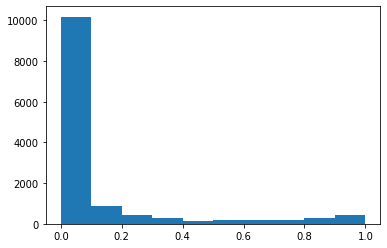

In [51]:
plt.hist(R2s)

In [63]:
greater_than = [True if x > .5 else False for x in R2s]

In [65]:
sum(greater_than)

1236

In [64]:
sum(greater_than) / len(R2s)

0.09361508748011815